In [1]:
setwd("/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1004. Wildfire ONES Analysis/P1004.2. Original Data")
Output = c("/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1004. Wildfire ONES Analysis/P1004.3. Heat Map/ Output")
cur_date = "020322"

library(readxl)
library(tidyverse)
library(reshape2)

#reading in file
gene_expression_data = read_csv("022821_NormCounts_pslog2_RUV.csv")
pathway_mRNAs = data.frame(read_excel("FlamingPeat_4h_pathwaymRNAs_020322.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  X1 = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [2]:
head(gene_expression_data)
head(pathway_mRNAs)

X1,M1_RedOakSmolder,M2_RedOakSmolder,M3_RedOakSmolder,M4_RedOakSmolder,M5_RedOakSmolder,M6_RedOakSmolder,M7_PeatSmolder,M8_PeatSmolder,M9_PeatSmolder,⋯,MH73_RedOakSmolder,MH74_RedOakSmolder,MH75_RedOakSmolder,MH76_RedOakSmolder,MH77_PeatSmolder,MH78_PeatSmolder,MH79_PeatSmolder,MH80_PeatSmolder,MH81_PeatSmolder,MH82_PeatSmolder
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610009B22Rik_56046,6.001951,7.335479,7.061139,6.989344,6.384322,6.120804,5.820447,5.395755,6.660710,⋯,11.441009,10.903624,10.884591,10.933032,11.111472,11.197014,11.108450,10.699222,11.084482,10.868255
0610010F05Rik_69119,10.293167,9.755566,9.720385,10.272557,10.170494,10.212171,9.834238,10.386983,9.907812,⋯,9.303855,9.350846,9.622918,8.924832,8.982636,9.344629,9.039890,9.152558,9.578020,9.299622
0610010F05Rik_74637,4.693722,4.574181,5.542715,4.385701,3.715631,5.601566,5.219821,5.259070,5.376674,⋯,5.388887,5.117777,5.622112,5.674268,5.662769,4.709338,5.484767,5.224846,5.725906,4.860043
0610010K14Rik_31619,9.353322,8.368016,8.311618,8.280457,8.973519,8.977257,8.831136,9.169027,8.672639,⋯,7.627248,7.680924,7.873690,7.918498,7.629239,7.764098,7.952784,7.425485,7.370099,7.194414
0610010K14Rik_31873,9.230662,9.038618,8.758387,8.900100,9.868493,8.992879,9.160850,9.037294,8.829621,⋯,8.785173,8.773179,9.054666,8.336706,8.098710,8.662672,8.197349,8.505360,8.677667,8.136555
0610010K14Rik_68949,7.049897,7.538015,7.604721,7.000066,6.555433,7.193874,7.003423,7.018238,7.559411,⋯,7.121863,7.200933,7.541390,7.630316,7.163479,7.752922,7.555034,7.315125,7.527259,7.503961


,Gene
,<chr>
1,ABCC1
2,ABCC4
3,ACTA1
4,ACTB
5,ACTG1
6,AKR1A1


In [3]:
#reshaping for easier filtering
gene_expression_data = melt(gene_expression_data %>% 
                            rename(Gene = X1), variable = "Treatment", value.name = "NormCount")
head(gene_expression_data)

Using Gene as id variables



,Gene,Treatment,NormCount
,<chr>,<fct>,<dbl>
1,0610009B22Rik_56046,M1_RedOakSmolder,6.001951
2,0610010F05Rik_69119,M1_RedOakSmolder,10.293167
3,0610010F05Rik_74637,M1_RedOakSmolder,4.693722
4,0610010K14Rik_31619,M1_RedOakSmolder,9.353322
5,0610010K14Rik_31873,M1_RedOakSmolder,9.230662
6,0610010K14Rik_68949,M1_RedOakSmolder,7.049897


In [4]:
peatflame_df = gene_expression_data %>%
    #removing exposures that aren't peat flame or saline
    filter(grepl("PeatFlame", Treatment) | grepl("Saline", Treatment)) %>%
    #removing heart samples 
    filter(!grepl("MH", Treatment))
head(peatflame_df)

,Gene,Treatment,NormCount
,<chr>,<fct>,<dbl>
1,0610009B22Rik_56046,M31_Saline,4.158986
2,0610010F05Rik_69119,M31_Saline,10.537305
3,0610010F05Rik_74637,M31_Saline,4.596222
4,0610010K14Rik_31619,M31_Saline,9.609108
5,0610010K14Rik_31873,M31_Saline,9.044397
6,0610010K14Rik_68949,M31_Saline,5.855893


In [5]:
#unfortunately grepl can only take a single string not a list for the first argument so using a loop
#now removing genes that aren't in the pathway of interest
pathway_peatflame_df = data.frame()
for (i in 1:length(pathway_mRNAs$Gene)){
    #print()
    filtered_df = peatflame_df %>%
        #removing extra numbers after the underscore
        separate(Gene, c("Gene", NA), sep = "_") %>%
        filter(grepl(pathway_mRNAs$Gene[i], Gene, ignore.case = TRUE))
    pathway_peatflame_df = rbind(pathway_peatflame_df, filtered_df)
}

#removing extra numbers after the underscore
pathway_peatflame_df = pathway_peatflame_df %>%
    separate(Gene, c("Gene", NA), sep = "_")
head(pathway_peatflame_df)

In [ ]:
# we have more genes that still need to be filtered
length(unique(pathway_peatflame_df$Gene)) == length(pathway_mRNAs$Gene)
length(unique(pathway_peatflame_df$Gene))
length(pathway_mRNAs$Gene)

In [ ]:
pathway_mRNAs$Gene
unique(pathway_peatflame_df$Gene)

In [1]:
peatflame_df %>%
    #removing extra numbers after the underscore
    separate(Gene, c("Gene", NA), sep = "_") %>%
    filter(tolower(Gene) %in% tolower(pathway_mRNAs$Gene))

ERROR: Error in peatflame_df %>% separate(Gene, c("Gene", NA), sep = "_") %>% : could not find function "%>%"


In [30]:
#now organzing df for heat map

#getting gene ordered by average concentrations
desc_genes_df = pathway_peatflame_df %>%
    mutate(Tx = ifelse(grepl("Saline", Treatment), "Saline", "Peat Flame")) %>%
    group_by(Gene) %>%
    summarize(Avg_NormCount = mean(NormCount)) %>%
    arrange(-Avg_NormCount)

head(desc_genes_df)

#getting treatment conditions ordered by average concentrations
desc_treatment_df = pathway_peatflame_df %>%
    mutate(Tx = ifelse(grepl("Saline", Treatment), "Saline", "Peat Flame")) %>%
    group_by(Tx, Treatment) %>%
    summarize(Avg_NormCount = mean(NormCount)) %>%
    arrange(desc(Tx), -Avg_NormCount)

head(desc_treatment_df)

Gene,Avg_NormCount
<chr>,<dbl>
Hspa5,12.71914
Il6st,11.50828
Actb,11.47294
Actg1,11.40669
Gstm3,11.22388
Txndc5,11.09197


`summarise()` has grouped output by 'Tx'. You can override using the `.groups` argument.



Tx,Treatment,Avg_NormCount
<chr>,<fct>,<dbl>
Saline,M36_Saline,7.383560
Saline,M101_Saline,7.227176
Saline,M35_Saline,7.209947
Saline,M106_Saline,7.162497
Saline,M34_Saline,7.153283
Saline,M32_Saline,7.137374


# Heat Map

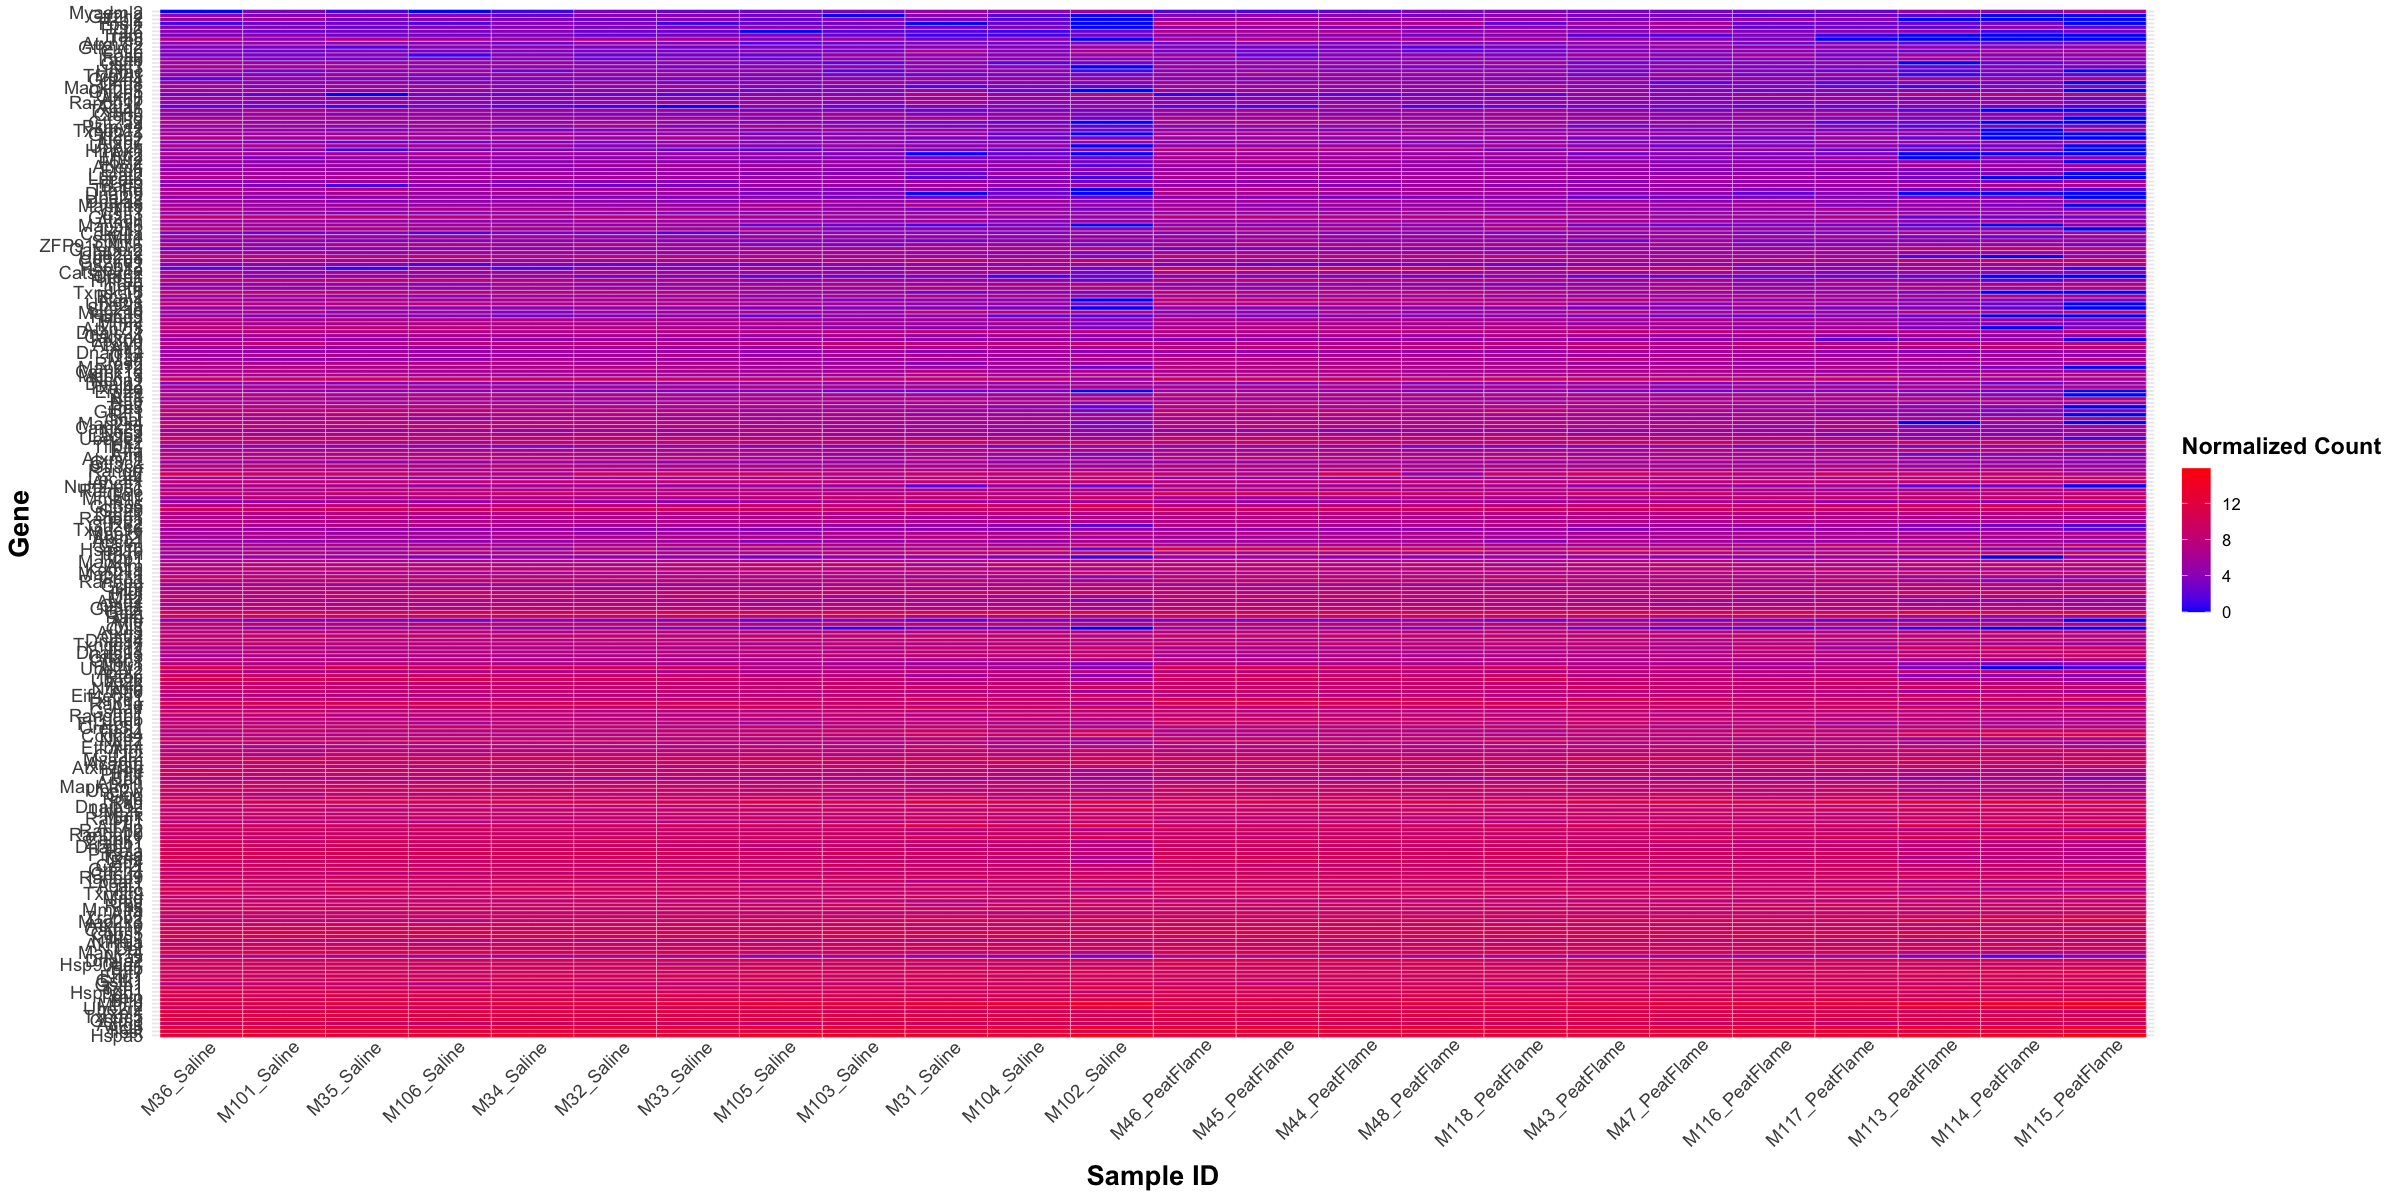

In [32]:
options(repr.plot.width=20, repr.plot.height=10) #changing size
 

#samples ordered by avg norm count
ordered_samples = factor(pathway_peatflame_df$Treatment, levels = desc_treatment_df$Treatment)

#genes ordered by avg norm count
ordered_genes = factor(pathway_peatflame_df$Gene, levels = desc_genes_df$Gene)

lung_peatflame_heatmap = ggplot(data = pathway_peatflame_df, aes(x = ordered_samples, y = ordered_genes, fill = NormCount)) + 
  geom_tile(color = "white") + 
  scale_fill_gradient(low = 'blue', high = 'red') + 
  theme_minimal() + 
  theme(axis.text = element_text(size = 11), #changing size of axes labels
        axis.text.x = element_text(angle = 45, hjust = 0.9), #rotating x labels/ moving x labels slightly to the left
        axis.title = element_text(face = "bold", size = rel(1.5)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 10))+ #changes legend text

  labs(x = "Sample ID", y = "Gene", fill = "Normalized Count")

lung_peatflame_heatmap